In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

## Exercise 05 
### Simulation data analysis with GROMACS

#### 6.1 Processing simulation output

The number of atoms belonging to each system, the number of samples in the trajectories and the size of the time step between frames for apo-langerin and holo-langerin are shown in the table below:

In [1]:
data = {
    'Number of Atoms': [2015, 2017],
    'Number of Samples': [22001, 22001],
    'Time Step Size (ps)': [10, 10]
}
df = pd.DataFrame(data, index = ['Apo-Langerin', 'Holo-Langerin'])
df

,Number of Atoms,Number of Samples,Time Step Size (ps)
Apo-Langerin,2015,22001,10
Holo-Langerin,2017,22001,10


#### 6.2 Root mean square fluctuation (RMSF)

The calculated RMSF for all Cα-atoms in the trajectories for apo-langerin and holo-langerin are shown below:

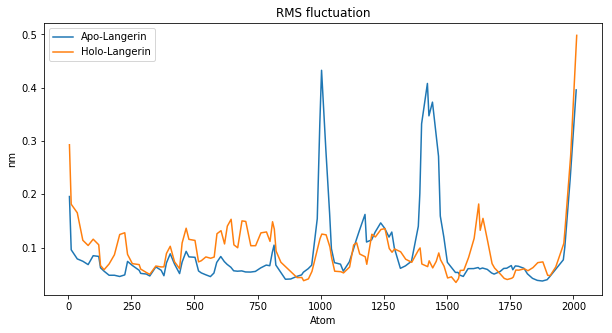

In [3]:
x, y = np.loadtxt('rmsfA.xvg', skiprows = 17, unpack = True)
a, b = np.loadtxt('rmsfB.xvg', skiprows = 17, unpack = True)
fig = plt.figure(figsize=(10, 5))
plt.plot(x,y, label = 'Apo-Langerin')
plt.plot(a,b, label = 'Holo-Langerin')
plt.title('RMS fluctuation')
plt.xlabel('Atom')
plt.ylabel('nm')
plt.legend()
plt.show()

#### 6.3 Root mean square deviation (RMSD)

The RMSD vs. time for both apo-langerin and holo-langerin are shown below, first as a line graph and then as a histogram.

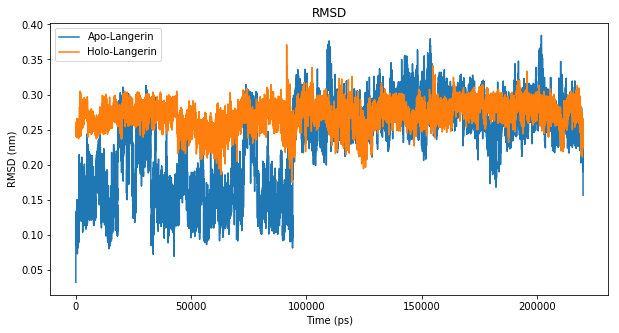

In [5]:
x,y = np.loadtxt("rmsdA.xvg", skiprows = 18, unpack=True)
a,b = np.loadtxt("rmsdB.xvg", skiprows =18, unpack = True)
fig = plt.figure(figsize=(10, 5))
plt.plot(x,y, label = 'Apo-Langerin')
plt.plot(a,b, label = 'Holo-Langerin')
plt.title('RMSD')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (nm)')
plt.legend()
plt.show()

In [7]:
x,y = np.loadtxt("rmsdA.xvg", skiprows = 18, unpack=True)
a,b = np.loadtxt("rmsdB.xvg", skiprows =18, unpack = True)

Text(0.5, 0, 'RMSD (nm)')

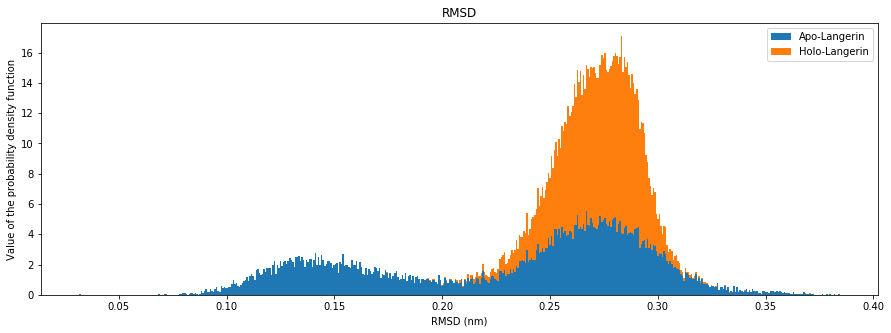

In [18]:
np.histogram(y, density = True, bins = 500)
np.histogram(b, density = True, bins = 500)
fig = plt.figure(figsize=(15, 5))
plt.hist([y,b], density = True, bins = 500, histtype = 'barstacked')
plt.title('RMSD')
plt.legend(['Apo-Langerin', 'Holo-Langerin'])
plt.ylabel('Value of the probability density function')
plt.xlabel('RMSD (nm)')

#### 6.4 Dihedral angles

In [29]:
prefix = 'ignore/anglesA/'
files = ['chi1HIS97', 'chi2HIS97', 'psiHIS97', 'phiHIS97']
sufix = '.xvg'
files = [prefix + i + '.xvg' for i in files]
files
angle_names = ['chi1', 'chi2', 'psi', 'phi']

In [34]:
dfs = [pd.read_csv(f, 
                   header=None, 
                   names=['time', n],
                   skiprows=17, 
                   index_col=0,
                   delim_whitespace=True) for n, f in zip(angle_names, files)]
df = pd.concat(dfs, axis=1)

In [36]:
df.shape

(22001, 4)

Text(0.5, 0, 'Dihedral (degrees)')

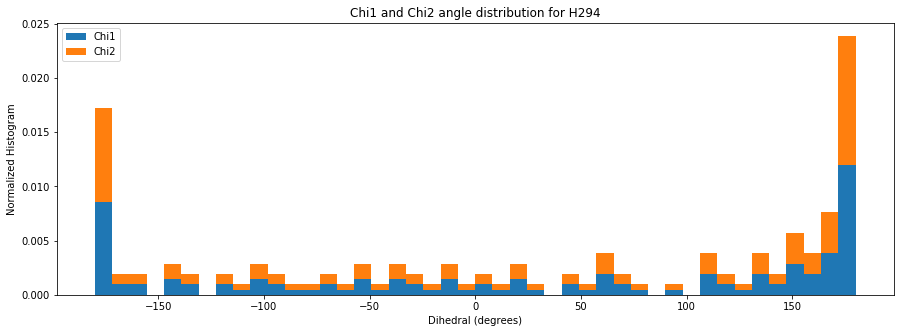

In [5]:
# bins = np.linspace(-180, 180, 45)
# # hist_chi1, bins_chi1 = np.histogram((chi1 - 1) * 180, density = True, bins=bins)
# fig = plt.figure(figsize=(15, 5))
# plt.hist([gro2deg(chi1), gro2deg(chi2)], 
#          density = True, 
#          bins = bins, 
#          histtype = 'barstacked')
# plt.title('Chi1 and Chi2 angle distribution for H294')
# plt.legend(['Chi1', 'Chi2'])
# plt.ylabel('Normalized Histogram')
# plt.xlabel('Dihedral (degrees)')

In [18]:
# fig = plt.figure(figsize=(7, 7))
# h, x, y = np.histogram2d(gro2deg(phi), gro2deg(psi), bins=90, density=True)
# hh = -np.log(h)
# # plt.hist2d(gro2deg(phi), gro2deg(psi), 
# #            bins=(90, 90), 
# #            range=((-180, 180), (-180, 180)), 
# #            density=True, norm=LogNorm(), 
# #            cmin=0, 
# #            cmax=6)
# # plt.title('Ramachandran Plot - Phi versus Psi')
# # plt.ylabel('Phi (degrees)')
# # plt.xlabel('Psi (degrees)')

/storage/mi/milleb92/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

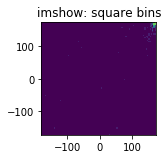

In [23]:
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(131, title='imshow: square bins')
# plt.imshow(h, 
#            interpolation='nearest', 
#            origin='low',
#            extent=[x[0], x[-1], y[0], y[-1]])

#### 6.5 Atomic Distances

The distances between the Cα-atoms of M260 and G290 for the given trajectories have been extracted and are shown below as a normalised histogram:

In [ ]:
x,y = np.loadtxt("mindistA.xvg", skiprows = 24, unpack=True)
a,b = np.loadtxt("mindistB.xvg", skiprows =24, unpack = True)

Text(0.5, 0, 'Distance (nm)')

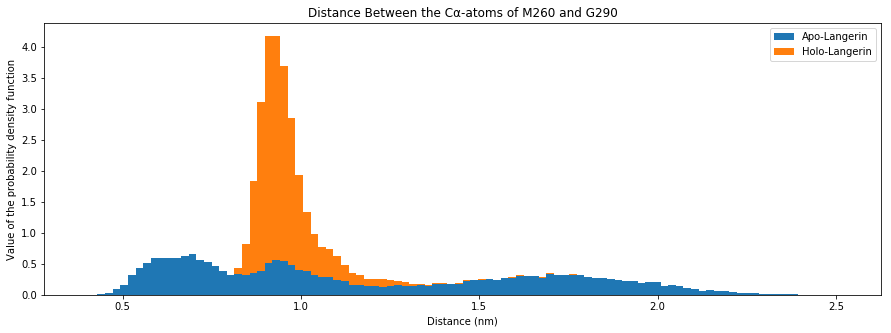

In [22]:
np.histogram(y, density = True)
np.histogram(b, density = True)
fig = plt.figure(figsize=(15, 5))
plt.hist([y,b], density = True, bins = 100, histtype = 'barstacked')
plt.title('Distance Between the Cα-atoms of M260 and G290')
plt.legend(['Apo-Langerin', 'Holo-Langerin'])
plt.ylabel('Value of the probability density function')
plt.xlabel('Distance (nm)')